In [34]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [35]:
# Load dataset into a dataframe
decantalo = pd.read_csv("./data/scrapped/decantalo_listings.csv")
decantalo.head()

,rating,num_review,wine_type,size (cL),name,price,country,abv,year,url
0,4.9,52,white,75.0,Enate Chardonnay 234,10.55,Spain,13.5,2021.0,https://www.decantalo.com/uk/en/enate-chardonn...
1,4.8,26,white,75.0,José Pariente Verdejo,11.33,Spain,13.0,2021.0,https://www.decantalo.com/uk/en/jose-pariente-...
2,4.8,15,white,75.0,The Flower and the Bee,10.85,Spain,13.0,2021.0,https://www.decantalo.com/uk/en/the-flower-and...
3,5.0,2,white,75.0,Can Sumoi Xarel·lo,13.64,Spain,14.0,2021.0,https://www.decantalo.com/uk/en/can-sumoi-xare...
4,4.8,6,white,75.0,Martín Codax Albariño,13.73,Spain,12.0,2021.0,https://www.decantalo.com/uk/en/martin-codax-a...


In [36]:
# IMPLEMENT THE FIX
# Rename the column name for convenience
decantalo.rename(columns={"size (cL)" : "size"}, inplace=True)

In [37]:
# Check types of all variables
decantalo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7259 entries, 0 to 7258
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rating      7259 non-null   float64
 1   num_review  7259 non-null   int64  
 2   wine_type   7259 non-null   object 
 3   size        7128 non-null   float64
 4   name        7259 non-null   object 
 5   price       7259 non-null   object 
 6   country     7216 non-null   object 
 7   abv         7244 non-null   float64
 8   year        6863 non-null   float64
 9   url         7259 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 567.2+ KB


In [38]:
# Count NA values
decantalo.isna().sum()

rating          0
num_review      0
wine_type       0
size          131
name            0
price           0
country        43
abv            15
year          396
url             0
dtype: int64

In [39]:
# Check number of unique values in all columns
decantalo.nunique()

rating          19
num_review      43
wine_type        7
size             4
name          6498
price         1533
country         21
abv             96
year            25
url           7247
dtype: int64

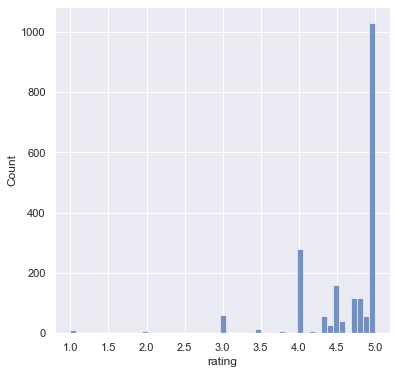

In [40]:
# Histogram plots for rating
sns.set(rc={"figure.figsize":(6,6)})

sns.histplot(decantalo.query('num_review > 0')["rating"])
# decantalo["rating"].unique()

plt.show()

<AxesSubplot:xlabel='num_review', ylabel='Count'>

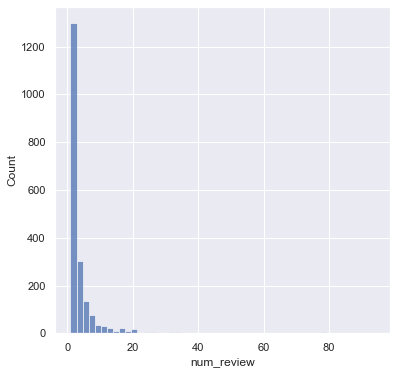

In [41]:
# Histogram plots for number of reviews. There are some extreme values at the end
sns.set(rc={"figure.figsize":(6,6)})

sns.histplot(decantalo.query('num_review > 0')["num_review"], kde=False, bins=50)
# decantalo["num_review"].unique()

<AxesSubplot:xlabel='num_review', ylabel='Count'>

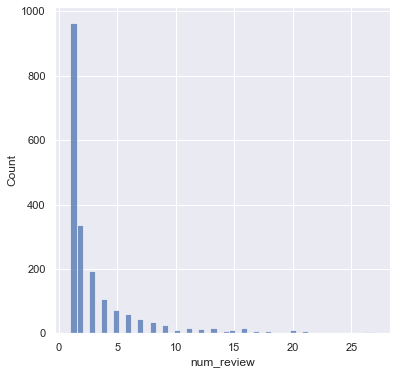

In [42]:
# Histogram plots for number of reviews, without the extreme values. Still very skewed
sns.set(rc={"figure.figsize":(6,6)})

sns.histplot(decantalo.query('num_review > 0 and num_review < 30')["num_review"], kde=False, bins=50)
# decantalo["num_review"].unique()

<AxesSubplot:xlabel='wine_type', ylabel='Count'>

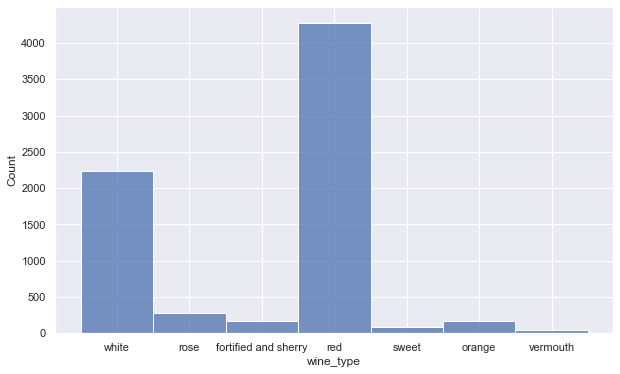

In [43]:
# Histogram plots for wine type
sns.set(rc={"figure.figsize":(10,6)})

sns.histplot(decantalo["wine_type"])

<AxesSubplot:xlabel='size', ylabel='Count'>

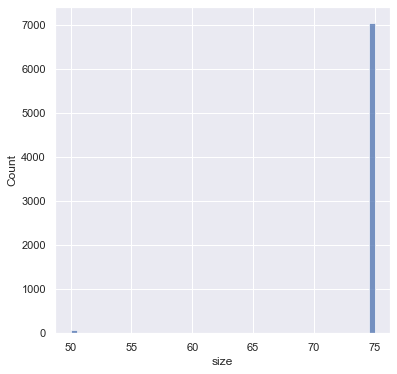

In [44]:
# Histogram plots for size
sns.set(rc={"figure.figsize":(6,6)})

sns.histplot(decantalo["size"], kde=False, bins=50)

In [45]:
# Number of bottles by size. Most are 75 cl.
decantalo.groupby('size').size()

size
50.0      70
62.0       5
70.0       1
75.0    7052
dtype: int64

In [46]:
# IMPLEMENT THE FIX
# As info showed that price is of type object, it indicates there might be non-numerical values in it. 
# Converting the column to float and any non numeric value to Nan. We will handle Nan later
decantalo["price"] = decantalo["price"].apply(pd.to_numeric, errors = "coerce")
decantalo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7259 entries, 0 to 7258
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rating      7259 non-null   float64
 1   num_review  7259 non-null   int64  
 2   wine_type   7259 non-null   object 
 3   size        7128 non-null   float64
 4   name        7259 non-null   object 
 5   price       5828 non-null   float64
 6   country     7216 non-null   object 
 7   abv         7244 non-null   float64
 8   year        6863 non-null   float64
 9   url         7259 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 567.2+ KB


In [47]:
# IMPLEMENT THE FIX
# Fix missing countries to unknown value
decantalo["country"].fillna("unknown" , inplace=True)
decantalo["country"].unique()

array(['Spain', 'France', 'Portugal', 'Italy', 'Germany', 'Argentina',
       'Greece', 'unknown', 'South Africa', 'Austria', 'Hungary',
       'Slovenia', 'Chile', 'New Zealand', 'Croatia', 'United States',
       'Australia', 'Peru', 'Uruguay', 'Lebanon', 'Israel',
       'Czech Republic'], dtype=object)

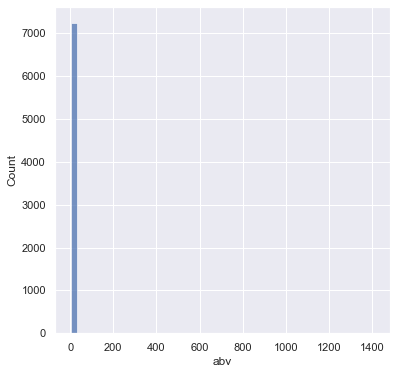

In [48]:
# Histogram plot of ABV. This shows an extreme value of > 1000. This is not possible as ABV can only be < 100.
sns.set(rc={"figure.figsize":(6,6)})
sns.histplot(decantalo["abv"], kde=False,bins=50)
plt.show()

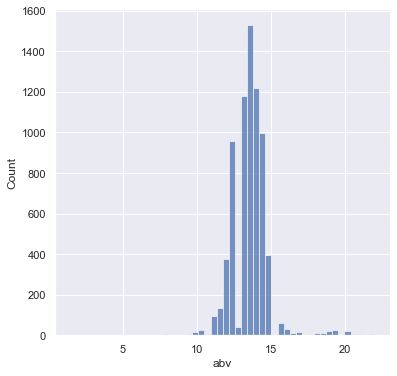

In [49]:
# Remove anything that's > 100. Much better now.
sns.set(rc={"figure.figsize":(6,6)})
sns.histplot(decantalo.query('abv < 100')["abv"], kde=False,bins=50)
plt.show()

In [50]:
# IMPLEMENT THE FIX
decantalo = decantalo.query('abv < 100')

In [51]:
# checking if the value is removed
print(decantalo.describe())

# Compute % of missing values
print('Missing pct', decantalo["abv"].isna().sum()/len(decantalo["abv"])*100)

# As the % of missing values is very small, we will drop the rows having abv value as NA
decantalo.dropna(subset = ["abv"], inplace=True)

print('Missing pct after dropping', decantalo["abv"].isna().sum())


            rating   num_review         size         price          abv  \
count  7243.000000  7243.000000  7118.000000   5819.000000  7243.000000   
mean      1.283777     1.118735    74.744310     47.626702    13.537801   
std       2.095685     4.530541     2.490805    366.862011     1.268156   
min       0.000000     0.000000    50.000000      6.650000     1.500000   
25%       0.000000     0.000000    75.000000     12.780000    13.000000   
50%       0.000000     0.000000    75.000000     18.530000    13.500000   
75%       4.000000     1.000000    75.000000     30.310000    14.000000   
max       5.000000    94.000000    75.000000  26384.190000    22.000000   

              year  
count  6855.000000  
mean   2018.732312  
std       2.357828  
min    1955.000000  
25%    2018.000000  
50%    2019.000000  
75%    2020.000000  
max    2022.000000  
Missing pct 0.0
Missing pct after dropping 0


Missing pct 5.356896313682176


<AxesSubplot:xlabel='year', ylabel='Count'>

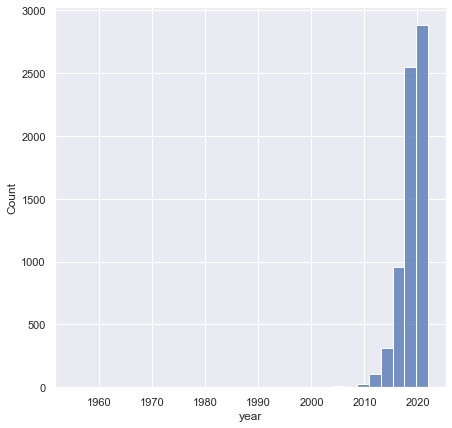

In [52]:
# Histogram plot of year

print('Missing pct', decantalo["year"].isna().sum()/len(decantalo["year"])*100)
sns.set(rc={"figure.figsize":(7,7)})

sns.histplot(decantalo["year"], bins=30)

# As only 5% is missing, we will keep it as is and can use other column values for analysis 


In [53]:
# Feature Engineering
decantalo = decantalo.reset_index(drop=True)

# Find age
decantalo.loc[:, "age"] = 2022 - decantalo["year"]

# # one hot encoding of wine_type (after merge)
# pd.get_dummies(decantalo, drop_first=True, columns=["wine_type"])

# Creating a column with ratings >5
for i, num in enumerate(decantalo["num_review"]):
    if num > 5:
        decantalo.loc[i, "score"] = decantalo.loc[i, "rating"]
    else:
        decantalo.loc[i, "score"] = 0

# Basically if has more than 5 reviews, score = rating, else score = 0

In [54]:
# Impute size to most frequent value
# That is 75cl which is reasonable
impute = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
decantalo[["size"]]=impute.fit_transform(decantalo[["size"]])

# To scale size --> Price per cl
for i, size in enumerate(decantalo["size"]):
    decantalo.loc[i, "scaledprice"] = decantalo.loc[i, "price"] * 75 / size

decantalo.loc[decantalo["size"] != 75, ["size", "price", "scaledprice"]]

# Creating a new column log price as it is skewed
# Doesn't make sense
decantalo.loc[:, "logprice"] = np.log10(decantalo.loc[:,"scaledprice"])


In [55]:
# creating country codes
import pycountry

# create a dict f country name and their codes 
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

decantalo["countrycode"] = [countries.get(c, "unknown") for c in decantalo["country"]]
decantalo.head()

,rating,num_review,wine_type,size,name,price,country,abv,year,url,age,score,scaledprice,logprice,countrycode
0,4.9,52,white,75.0,Enate Chardonnay 234,10.55,Spain,13.5,2021.0,https://www.decantalo.com/uk/en/enate-chardonn...,1.0,4.9,10.55,1.023252,ESP
1,4.8,26,white,75.0,José Pariente Verdejo,11.33,Spain,13.0,2021.0,https://www.decantalo.com/uk/en/jose-pariente-...,1.0,4.8,11.33,1.054230,ESP
2,4.8,15,white,75.0,The Flower and the Bee,10.85,Spain,13.0,2021.0,https://www.decantalo.com/uk/en/the-flower-and...,1.0,4.8,10.85,1.035430,ESP
3,5.0,2,white,75.0,Can Sumoi Xarel·lo,13.64,Spain,14.0,2021.0,https://www.decantalo.com/uk/en/can-sumoi-xare...,1.0,0.0,13.64,1.134814,ESP
4,4.8,6,white,75.0,Martín Codax Albariño,13.73,Spain,12.0,2021.0,https://www.decantalo.com/uk/en/martin-codax-a...,1.0,4.8,13.73,1.137671,ESP


<AxesSubplot:>

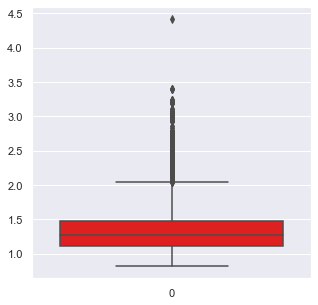

In [56]:
# price visualisation (log plot of price as the data is skewed)
sns.set(rc={"figure.figsize":(5,5)})

sns.boxplot(data=np.log10(decantalo["scaledprice"]), color= "red")


<AxesSubplot:>

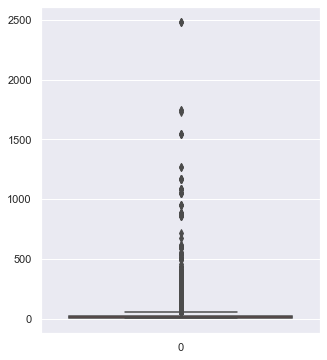

In [57]:
price_dropna = pd.to_numeric(decantalo["price"], errors='coerce')

# price visualisation. Remove the single outlier: £26000 bottle
sns.set(rc={"figure.figsize":(5,6)})

sns.boxplot(data=price_dropna[price_dropna < 20000], color= "red")

<AxesSubplot:>

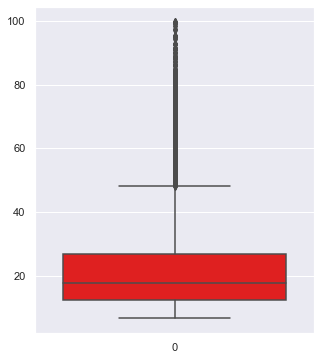

In [58]:
# price visualisation. Remove the single outlier: £26000 bottle
sns.set(rc={"figure.figsize":(5,6)})

sns.boxplot(data=price_dropna[price_dropna < 100], color= "red")


<AxesSubplot:xlabel='Count', ylabel='country'>

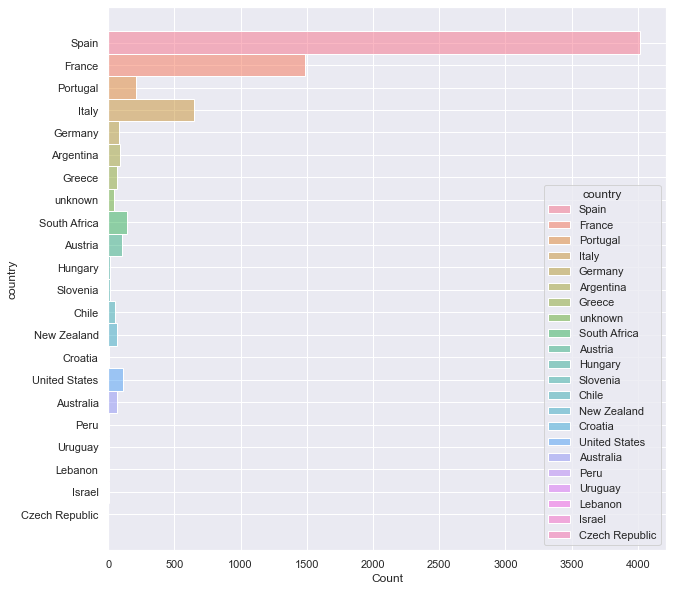

In [59]:
# Countries visualisation
# BREAK DOWN BY WINE TYPE
sns.set(rc={"figure.figsize":(10,10)})
sns.histplot(data=decantalo, y="country", hue="country")

Text(0.5, 1.0, 'Decantalo Price distribution by wine category - Listed price')

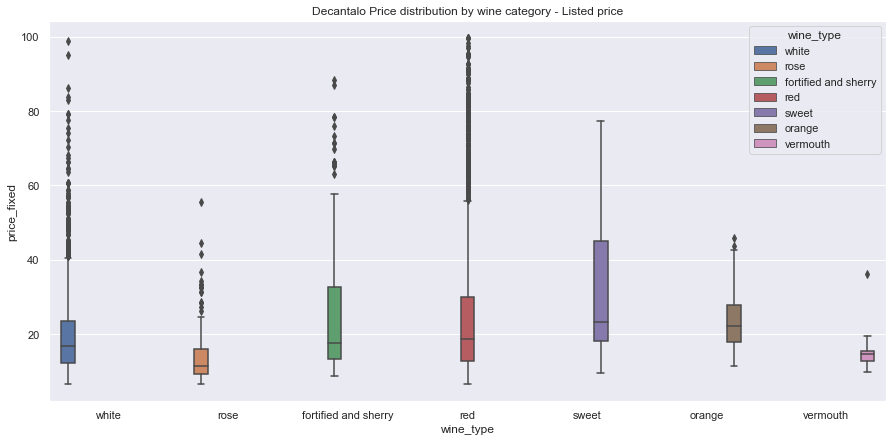

In [69]:
# plot wine type vs abs price
decantalo['price_fixed'] = pd.to_numeric(decantalo['price'], errors='coerce')


sns.set(rc={"figure.figsize":(15,7)})

sns.boxplot(
    data=decantalo.query('price_fixed < 100'),
    x="wine_type", y="price_fixed", hue="wine_type"
)

plt.title('Decantalo Price distribution by wine category - Listed price')

Text(0.5, 1.0, 'Decantalo Price distribution by wine category - Log tranformed')

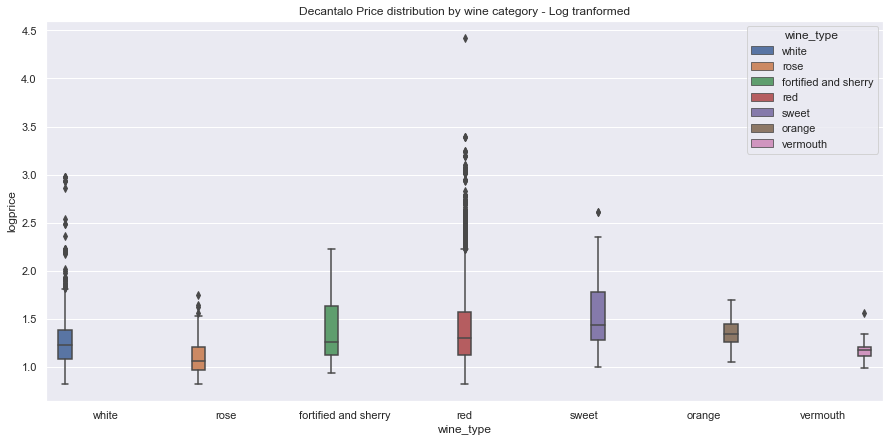

In [70]:
# plot wine type vs price

sns.set(rc={"figure.figsize":(15,7)})

sns.boxplot(
    data=decantalo,
    x="wine_type", y="logprice", hue="wine_type"
)

plt.title('Decantalo Price distribution by wine category - Log tranformed')

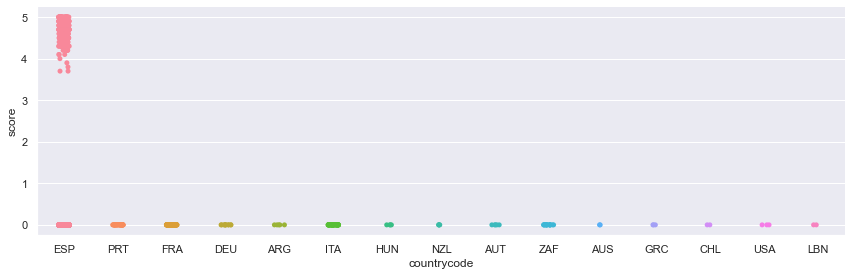

In [62]:
# plot country vs review ratings
sns.catplot(
    data=decantalo.query('num_review > 0').loc[decantalo["countrycode"]!="unknown"], 
    x="countrycode", 
    y="score", 
    height=4, 
    aspect=3,
)

<AxesSubplot:xlabel='age', ylabel='logprice'>

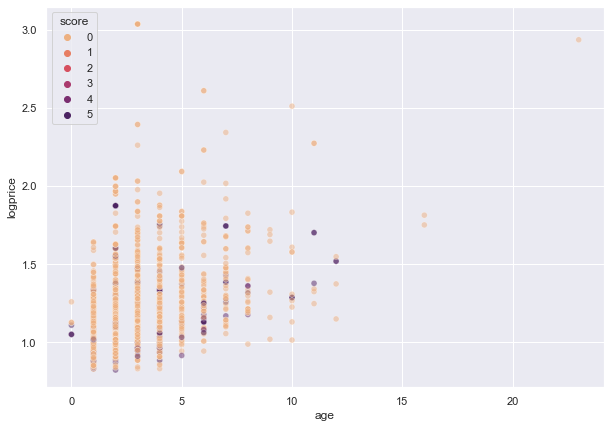

In [63]:
sns.scatterplot(
    data=decantalo.query('num_review > 0'), 
    hue='score', 
    x='age', 
    y='logprice', 
    alpha=.5, 
    palette='flare',
)

Text(0.5, 0, 'LogPrice')

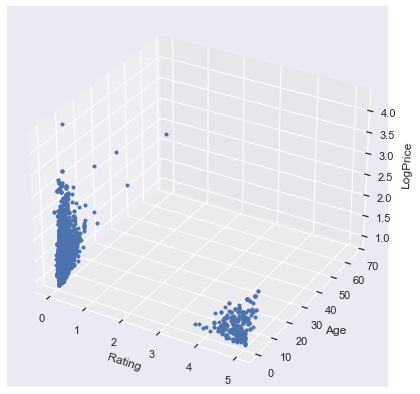

In [64]:
# Plot log price vs age and rating

from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(decantalo["score"], decantalo["age"], decantalo["logprice"], '.')
ax.set_xlabel("Rating")
ax.set_ylabel("Age")
ax.set_zlabel("LogPrice")

In [65]:
# Plot top 5 frequent years
topyear=decantalo.loc[:, "year"].value_counts().sort_values(ascending=False)
top=topyear.iloc[0:5]
topy =pd.DataFrame({'year':top.index, 'count':top.values})
topy


,year,count
0,2020.0,1527
1,2019.0,1484
2,2021.0,1338
3,2018.0,1064
4,2017.0,604


<AxesSubplot:xlabel='year', ylabel='count'>

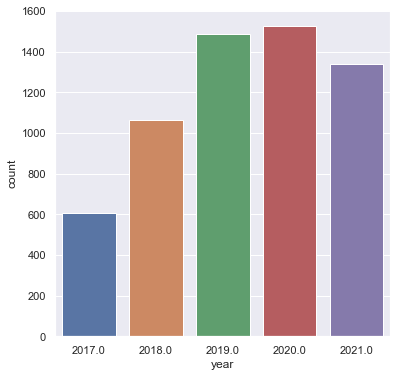

In [66]:
sns.set(rc={"figure.figsize":(6,6)})
sns.barplot(data=topy, x= "year", y = "count")



In [67]:
# Rename the column name for convenience
decantalo.rename(columns={"size" : "size(cL)", "scaledprice" : "scaled_price" }, inplace=True)
decantalo

,rating,num_review,wine_type,size(cL),name,price,country,abv,year,url,age,score,scaled_price,logprice,countrycode,price_fixed
0,4.9,52,white,75.0,Enate Chardonnay 234,10.55,Spain,13.5,2021.0,https://www.decantalo.com/uk/en/enate-chardonn...,1.0,4.9,10.55,1.023252,ESP,10.55
1,4.8,26,white,75.0,José Pariente Verdejo,11.33,Spain,13.0,2021.0,https://www.decantalo.com/uk/en/jose-pariente-...,1.0,4.8,11.33,1.054230,ESP,11.33
2,4.8,15,white,75.0,The Flower and the Bee,10.85,Spain,13.0,2021.0,https://www.decantalo.com/uk/en/the-flower-and...,1.0,4.8,10.85,1.035430,ESP,10.85
3,5.0,2,white,75.0,Can Sumoi Xarel·lo,13.64,Spain,14.0,2021.0,https://www.decantalo.com/uk/en/can-sumoi-xare...,1.0,0.0,13.64,1.134814,ESP,13.64
4,4.8,6,white,75.0,Martín Codax Albariño,13.73,Spain,12.0,2021.0,https://www.decantalo.com/uk/en/martin-codax-a...,1.0,4.8,13.73,1.137671,ESP,13.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7238,5.0,2,vermouth,75.0,Punt E Mes Vermouth,16.82,unknown,16.0,NaN,https://www.decantalo.com/uk/en/punt-e-mes-ver...,NaN,0.0,16.82,1.225826,unknown,16.82
7239,0.0,0,vermouth,75.0,El Bandarra blanco,14.03,Spain,15.0,NaN,https://www.decantalo.com/uk/en/el-bandarra-bl...,NaN,0.0,14.03,1.147058,ESP,14.03
7240,5.0,1,vermouth,75.0,Vermouth Belsazar Dry,19.26,unknown,19.0,NaN,https://www.decantalo.com/uk/en/vermouth-belsa...,NaN,0.0,19.26,1.284656,unknown,19.26
7241,5.0,2,vermouth,75.0,Vermut El Bandarra,14.03,Spain,15.0,NaN,https://www.decantalo.com/uk/en/vermut-el-band...,NaN,0.0,14.03,1.147058,ESP,14.03


In [68]:
decantalo.to_csv("./data/ready to merge/decantalo_to_merge.csv", index=False)